**Name:** Bala Guga Gopal S

**Batch:**  R2

**Date:** 20 Dec 2022

**Experiment Name:**  Classification of a non-linear 4 class data (Moon/Blob Dataset Keras/Scikit-Learn Library [Use make_moon/make_blobs function) problem with a multilayer perceptron: Dec 20 

**Experiment Description:** Classification of a non-linear 4 class data problem with a multilayer perceptron

# Classification of Non-linear data

Classification machine learning algorithms learn to assign labels to input examples (observations). The goal of a classification algorithm is to learn how to divide up the feature space such that labels are assigned correctly to points in the feature space, or at least, as correctly as is possible.

In this experiment the make_blobs() scikit-learn function is used to create dataset and define a classification task with a two-dimensional numerical feature space and each point assigned one of 4 class labels.

Using MLP classifier, SVM classifier and Logistic regeression from the Scikit learn, the model is trained these created dataset.

## Import libraries

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Generate classification dataset

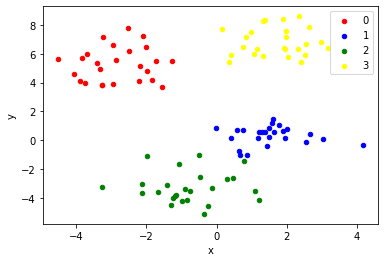

In [3]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=4, n_features=2)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green', 3:'yellow'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

# Viweing the dataset

In [4]:
#Using the dataframe from pandas
X_df = pd.DataFrame(X, columns=['x1','x2'])
X_df.head()

,x1,x2
0,1.981041,7.176616
1,-3.275453,-3.282969
2,1.314323,8.285866
3,-1.662457,-3.592923
4,0.745858,0.702252


In [5]:
y_df = pd.DataFrame(y, columns=["class"])
y_df.head()

,class
0,3
1,2
2,3
3,2
4,1


In [6]:
frames = [X_df, y_df]
data = pd.concat(frames, axis=1)
data.head()

,x1,x2,class
0,1.981041,7.176616,3
1,-3.275453,-3.282969,2
2,1.314323,8.285866,3
3,-1.662457,-3.592923,2
4,0.745858,0.702252,1


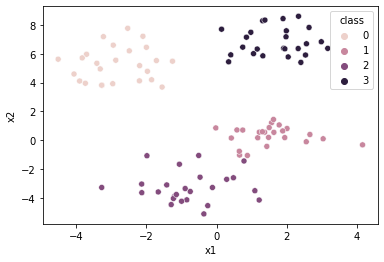

In [7]:
# create scatter plot for samples from each class
sns.scatterplot(x="x1", y="x2", hue='class', data=data)

# Using MLP classifier

In [8]:
#splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.20, random_state = 1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((80, 2), (80,), (20, 2), (20,))

In [50]:
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier with one hidden layer, 2 units
classifier = MLPClassifier(hidden_layer_sizes=(2,), max_iter=2000,activation = 'relu',solver='adam',random_state=1)

In [51]:
#train the model
classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))

0.7625


In [52]:
#Predicting y for X_val
y_pred = classifier.predict(X_val)
print(classifier.score(X_val, y_val))

0.6


In [53]:
#confusion matrix
print(confusion_matrix(y_val, y_pred))

[[0 0 0 8]
 [0 7 0 0]
 [0 0 2 0]
 [0 0 0 3]]


In [55]:
#Classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2
           3       0.27      1.00      0.43         3

    accuracy                           0.60        20
   macro avg       0.57      0.75      0.61        20
weighted avg       0.49      0.60      0.51        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Using SVM (RBF kernal)

In [56]:
model = SVC(kernel = 'rbf').fit(X_train,y_train)
#model score
print(model.score(X_train, y_train))

1.0


In [57]:
#predections
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

1.0


In [58]:
# confusion matrix and classification report
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[8 0 0 0]
 [0 7 0 0]
 [0 0 2 0]
 [0 0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# Logistic Regression

In [59]:
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)

LogisticRegression()

In [60]:
#Predections

y_pred = model.predict(X)

In [61]:
# evaluate the predictions
acc = accuracy_score(y, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.990


In [62]:
# confusion matrix and classification report
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[25  0  0  0]
 [ 0 25  0  0]
 [ 0  1 24  0]
 [ 0  0  0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      1.00      0.98        25
           2       1.00      0.96      0.98        25
           3       1.00      1.00      1.00        25

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



# Drawing the desicion boundaries

In [63]:
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

In [64]:
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

In [65]:
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

In [66]:
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

In [67]:
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

In [68]:
# make predictions for the grid
y_pred = model.predict(grid)

In [69]:
# reshape the predictions back into a grid
zz = y_pred.reshape(xx.shape)

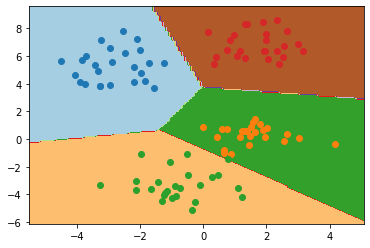

In [70]:
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(4):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

In [71]:
y_pred = model.predict_proba(grid)
# keep just the probabilities for class 0
y_pred = y_pred[:, 0]

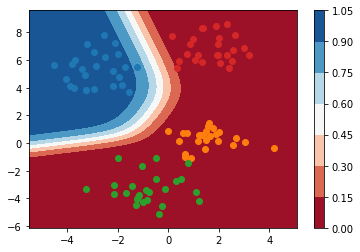

In [72]:
zz = y_pred.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='RdBu')
# add a legend, called a color bar
plt.colorbar(c)
# create scatter plot for samples from each class
for class_value in range(4):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')